### What is Time Series?
- Time series is basically sequentially ordered data indexed over time. Here time is the independent variable while the dependent variable might be:
  - Stock market data
  - Sales data of companies
  - Data from the sensors of smart devices
  - The measure of electrical energy generated in the powerhouse, and so on.

- To gain some useful insights from time-series data, you have to decompose the time series and look for some basic components such as trend, seasonality, cyclic behaviour, and irregular fluctuations. Based on some of these behaviours, we can decide on which model to choose for time series modelling. 

- Assume that you are having the time-series data of an airline passenger company, if you do an initial analysis on the data, you can find that in each year during particular periods of time, a particular pattern may be found(a seasonal pattern). Upon further investigation, we may find that this pattern occured during the vacation times. Also, you may be able to find other insights like an increase/decrease in the passenger count(upward/downward trend), which may be related to some other factors that were affecting the airlines at that time. 

Let’s get a better understanding of these terms by examining the time series plots themselves.

### Basic Components of Time Series

1. Seasonality
![alt text](https://editor.analyticsvidhya.com/uploads/82495SeasonalAdjustmentUsingaStableSeasonalFilterExample_01.png)

This data contains the record of the total number of deaths happening in a month. If we are taking a fixed time span of one year, we can find that by mid of each year there is a surge in the number of deaths occurring. This pattern is visible every year that we have observed. So, this is basically the seasonality present in the data. So if we say that a time series has seasonality, it implies that there are repeating patterns of almost constant length occurring over time. 

2. Trend
![alt text](https://editor.analyticsvidhya.com/uploads/26559trend1.png)

Analyzing this series we can observe that as we move along the horizontal axis, the value in the vertical axis is increasing. This is basically the trend i.e the linear increment or a decrement in the observed value as the recorded series progress over time. When it comes to time series modelling we usually remove these trends that are present in the series.

3. Cyclic Behaviour
![alt text](https://robjhyndman.com/hyndsight/2011-12-14-cyclicts_files/figure-html/unnamed-chunk-2-1.png)

Cyclic behaviour should not be confused with seasonality because in seasonality, a predictable pattern is observed in a regular interval of time, while in a cyclic variation the peaks and troughs don’t occur in a regular interval of time.

The above plot shows the monthly sales of new one-family houses sold in the USA (1973-1995). There is strong seasonality within each year, as well as some strong cyclic behaviour with period about 6 – 10 years. 

![alt text](https://editor.analyticsvidhya.com/uploads/89638Everything%20in%20a%20single%20picture_2.jpg)

### Stationary vs Non-Stationary Data

![alt text](https://editor.analyticsvidhya.com/uploads/66580Stationary%20vs%20non%20stationary%20time%20series.png)

This is not exactly a component of time series data, but these are the types of time series data that you may observe in the real world. If you keenly observe the above images you can find the difference between the two plots. 

In stationary time series the mean, variance, and standard deviation of the observed value over time are almost constant whereas in non-stationary time series this is not the case. 

So as a first step, we can check whether the time series is stationary or not, and if it’s not stationary we can apply some transformations to make it so. It is important to make time-series data stationary because a lot of statistical analysis and modelling depend upon stationary data. To check stationarity, we can perform tests such as the ADF (Augmented Dickey-Fuller) test which provides us a better intuition.

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

In [2]:
# Reading the data
df = pd.read_csv("portland-oregon-average-monthly-.csv")

The dataset is a monthly count of riders for the Portland public transportation system from January 1960 through June 1969.

It contains two columns, one represents the month and other represents the total number of riders for the Portland public transportation system.

In [3]:
# A glance on the data 
df.head()

,Month,"Portland Oregon average monthly bus ridership (/100) January 1973 through June 1982, n=114"
0,1960-01,648
1,1960-02,646
2,1960-03,639
3,1960-04,654
4,1960-05,630


In [4]:
# getting some information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 2 columns):
 #   Column                                                                                      Non-Null Count  Dtype 
---  ------                                                                                      --------------  ----- 
 0   Month                                                                                       115 non-null    object
 1   Portland Oregon average monthly bus ridership (/100) January 1973 through June 1982, n=114  115 non-null    object
dtypes: object(2)
memory usage: 1.9+ KB


- Need to replace the col name with a shorter, suitable one
- Both the columns are categorical

In [5]:
# further analysis 
df.describe()

,Month,"Portland Oregon average monthly bus ridership (/100) January 1973 through June 1982, n=114"
count,115,115
unique,115,112
top,1960-01,1152
freq,1,2


In [6]:
df.columns = ["month", "average_monthly_ridership"]
df.head()

,month,average_monthly_ridership
0,1960-01,648
1,1960-02,646
2,1960-03,639
3,1960-04,654
4,1960-05,630


In [7]:
df.dtypes

month                        object
average_monthly_ridership    object
dtype: object

In [8]:
df['average_monthly_ridership'].unique()

array(['648', '646', '639', '654', '630', '622', '617', '613', '661',
       '695', '690', '707', '817', '839', '810', '789', '760', '724',
       '704', '691', '745', '803', '780', '761', '857', '907', '873',
       '910', '900', '880', '867', '854', '928', '1064', '1103', '1026',
       '1102', '1080', '1034', '1083', '1078', '1020', '984', '952',
       '1033', '1114', '1160', '1058', '1209', '1200', '1130', '1182',
       '1152', '1116', '1098', '1044', '1142', '1222', '1234', '1155',
       '1286', '1281', '1224', '1280', '1228', '1181', '1156', '1124',
       '1205', '1260', '1188', '1212', '1269', '1246', '1299', '1284',
       '1345', '1341', '1308', '1448', '1454', '1467', '1431', '1510',
       '1558', '1536', '1523', '1492', '1437', '1365', '1310', '1441',
       '1450', '1424', '1360', '1429', '1440', '1414', '1408', '1337',
       '1258', '1214', '1326', '1417', '1329', '1461', '1425', '1419',
       '1432', '1394', '1327', ' n=114'], dtype=object)

We can see here that this series consist an anamolous data which is the last one.

In [9]:
df = df.drop(df.index[df['average_monthly_ridership'] == ' n=114'])

In [10]:
df['average_monthly_ridership'].unique()

array(['648', '646', '639', '654', '630', '622', '617', '613', '661',
       '695', '690', '707', '817', '839', '810', '789', '760', '724',
       '704', '691', '745', '803', '780', '761', '857', '907', '873',
       '910', '900', '880', '867', '854', '928', '1064', '1103', '1026',
       '1102', '1080', '1034', '1083', '1078', '1020', '984', '952',
       '1033', '1114', '1160', '1058', '1209', '1200', '1130', '1182',
       '1152', '1116', '1098', '1044', '1142', '1222', '1234', '1155',
       '1286', '1281', '1224', '1280', '1228', '1181', '1156', '1124',
       '1205', '1260', '1188', '1212', '1269', '1246', '1299', '1284',
       '1345', '1341', '1308', '1448', '1454', '1467', '1431', '1510',
       '1558', '1536', '1523', '1492', '1437', '1365', '1310', '1441',
       '1450', '1424', '1360', '1429', '1440', '1414', '1408', '1337',
       '1258', '1214', '1326', '1417', '1329', '1461', '1425', '1419',
       '1432', '1394', '1327'], dtype=object)

Now our data is clean !!!

Changing data type of both the columns
* Assign int to ```monthly_ridership_data``` column
* Assign datetime to ```month``` column

In [11]:
df['average_monthly_ridership'] = df['average_monthly_ridership'].apply(lambda x: int(x))

# Alternatively,
# df['average_monthly_ridership'] = df['average_monthly_ridership'].astype(np.int32)

In [12]:
df['month'] = pd.to_datetime(df['month'], format = '%Y-%m')

In [13]:
df.dtypes

month                        datetime64[ns]
average_monthly_ridership             int64
dtype: object

In [14]:
df.set_index('month')

,average_monthly_ridership
month,
1960-01-01,648
1960-02-01,646
1960-03-01,639
1960-04-01,654
1960-05-01,630
...,...
1969-02-01,1425
1969-03-01,1419
1969-04-01,1432


In [15]:
df_copy = df.copy()

# Time Series Analysis

As you all know how important data analysis is for data scientists.It gives us a brief understanding of the data and a very strange but intriguing confidence about our prediction model.Well, Time series analysis is no different.But time series problems have very special orientation when it comes to analysis.But before we move into that, let me introduce you to some jargons (Just Kidding it is pure and simple english) which are frequently used in this problem domain.

**Trend**:- As the name suggests trend depicts the variation in the output as time increases.It is often non-linear. Sometimes we will refer to trend as “changing direction” when it might go from an increasing trend to a decreasing trend.

**Level**:- It basically depicts baseline value for the time series.

**Seasonal**:- As its name depicts it shows the repeated pattern over time. In layman terms, it shows the seasonal variation of data over time.

**Noise**:- It is basically external noises that vary the data randomly.

You can see below various graphs I plotted and what I inferred from them. which is totally oblivious to us such as stock market prediction, future sales prediction and so on.Time series problem is basically the prediction of such problems using various machine learning tools.Time series problem is tackled efficiently when first it is analyzed properly (Time Series Analysis) and according to that observation suitable algorithm is used (Time Series Forecasting).We'll study both of then later in this notebook. 

<Figure size 1080x576 with 0 Axes>

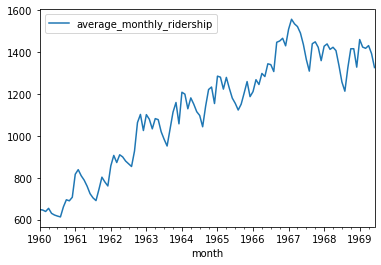

In [16]:
# Normal line plot to see data variation

plt.figure(figsize=(15,8))
df_copy.plot.line(x = 'month', y = 'average_monthly_ridership')
plt.show()

We observe the time series has trend and seasonality present and the average number of riders is increasing most of the time.

<Figure size 432x288 with 0 Axes>

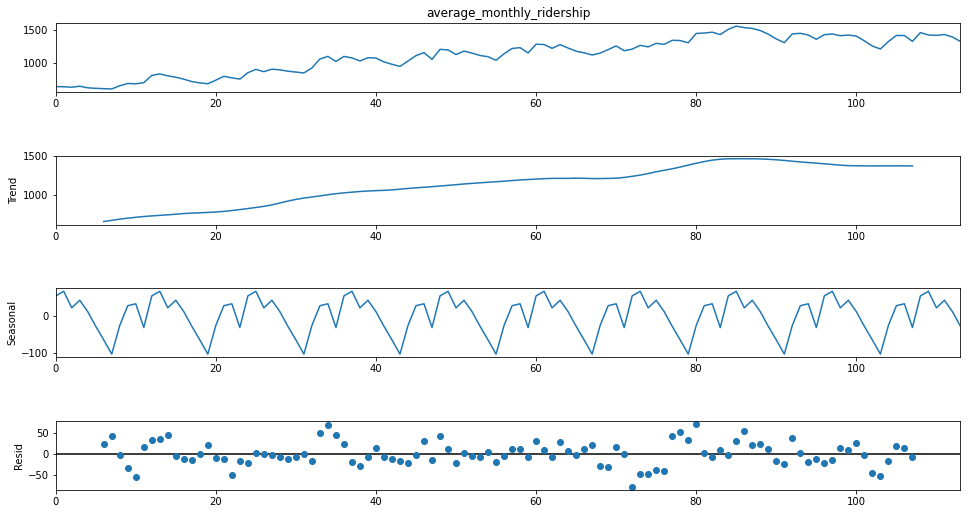

In [17]:
# Decomposing the time series data

from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df_copy.average_monthly_ridership, period=12)  
fig = plt.figure()  
fig = decomposition.plot()  
fig.set_size_inches(15, 8)

`statsmodels.tsa.seasonal.seasonal_decompose(x, model='additive', filt=None, period=None, two_sided=True, extrapolate_trend=0)`

**Parameters:**
- x: array_like
  
  Time series. If 2d, individual series are in columns. x must contain 2 complete cycles.

- model: {“additive”, “multiplicative”}, optional
  
  Type of seasonal component. Abbreviations are accepted.

- filt: array_like, optional

  The filter coefficients for filtering out the seasonal component. The concrete moving average method used in filtering is determined by two_sided.

- period: int, optional

  Period of the series. Must be used if x is not a pandas object or if the index of x does not have a frequency. Overrides default periodicity of x if x is a pandas object with a timeseries index.

- two_sided: bool, optional

  The moving average method used in filtering. If True (default), a centered moving average is computed using the filt. If False, the filter coefficients are for past values only.

- extrapolate_trend: int or ‘freq’, optional

  If set to > 0, the trend resulting from the convolution is linear least-squares extrapolated on both ends (or the single one if two_sided is False) considering this many (+1) closest points. If set to ‘freq’, use freq closest points. Setting this parameter results in no NaN values in trend or resid components.

Our earlier assumptions were true; there is indeed trend and seasonality present in this data

### Simple Average Method
- The easiest and the simplest method of studying seasonal variations. This method is used when the time series variable consists of only the seasonal and random components. 
- The effect of taking average of data corresponding to the same period (say first quarter of each year) is to eliminate the effect of random component and thus, the resulting averages consist of only seasonal component. These averages are then converted into seasonal indices.

Consider the graph given below. Let’s assume that the y-axis depicts the price of a coin and x-axis depicts the time(days).
![alt text](https://cdn.analyticsvidhya.com/wp-content/uploads/2018/02/avg_orig_new1-768x510.png)

We can infer from the graph that the price of the coin is increasing and decreasing randomly by a small margin, such that the average remains constant. Many a times we are provided with a dataset, which though varies by a small margin throughout it’s time period, but the average at each time period remains constant. In such a case we can forecast the price of the next day somewhere similar to the average of all the past days.

Such forecasting technique which forecasts the expected value equal to the average of all previously observed points is called Simple Average technique.
![alt text](https://cdn.analyticsvidhya.com/wp-content/uploads/2018/01/Screen-Shot-2018-01-25-at-7.45.10-PM-300x82.png)

We take all the values previously known, calculate the average and take it as the next value. Of course it won’t be it exact, but somewhat close. As a forecasting method, there are actually situations where this technique works the best.

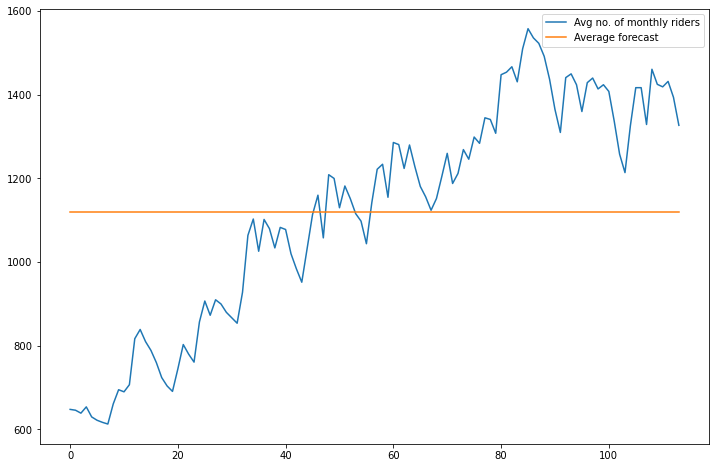

In [18]:
df_copy['avg_forecast'] = df_copy['average_monthly_ridership'].mean()
plt.figure(figsize=(12,8))
plt.plot(df_copy['average_monthly_ridership'], label='Avg no. of monthly riders')
plt.plot(df_copy['avg_forecast'], label='Average forecast')
plt.legend(loc='best')
plt.show()

### Moving Average Method
- In the method of moving average, successive arithmetic averages are computed from overlapping groups of successive values of a time series. Each group includes all the observations in a given time interval, termed as the period of moving average. 
- The next group is obtained by replacing the oldest value by the next value in the series. The averages of such groups are known as the moving averages. 
- The moving averages of a group are always shown at the centre of its period.
- The process of computing moving averages smoothens out the fluctuations in the time series data. 
- The larger the period of moving average, the more would be the reduction in the effect of random components but the more information is lost at the two ends of data.
- When the trend is non linear, the moving averages would give biased rather than the actual trend values.

Consider the graph given below. Let’s assume that the y-axis depicts the price of a coin and x-axis depicts the time(days).
![alt text](https://cdn.analyticsvidhya.com/wp-content/uploads/2018/02/mov_avg_new-300x208.png)

We can infer from the graph that the prices of the coin increased some time periods ago by a big margin but now they are stable. Many a times we are provided with a dataset, in which the prices/sales of the object increased/decreased sharply some time periods ago. In order to use the Simple Average method, we have to use the mean of all the previous data, but using all the previous data doesn’t sound right.

Using the prices of the initial period would highly affect the forecast for the next period. Therefore as an improvement over simple average, we will take the average of the prices for last few time periods only. Obviously the thinking here is that only the recent values matter. Such forecasting technique which uses window of time period for calculating the average is called Moving Average technique. Calculation of the moving average involves what is sometimes called a “sliding window” of size n.

Using a simple moving average model, we forecast the next value(s) in a time series based on the average of a fixed finite number ‘p’ of the previous values. Thus, for all i > p
![alt text](https://cdn.analyticsvidhya.com/wp-content/uploads/2018/01/Screen-Shot-2018-01-25-at-7.47.33-PM.png)

A moving average can actually be quite effective, especially if you pick the right p for the series.

The easiest way to calculate the simple moving average is by using the `pandas.Series.rolling method`. 

This method provides rolling windows over the data. On the resulting windows, we can perform calculations using a statistical function (in this case the mean). The size of the window (number of periods) is specified in the argument window.

The first rows of the returned series will contain null values since rolling needs a minimum of 'n' values (value specified in the window argument) to return the mean. We can change this behavior by modifying the argument min_periods.

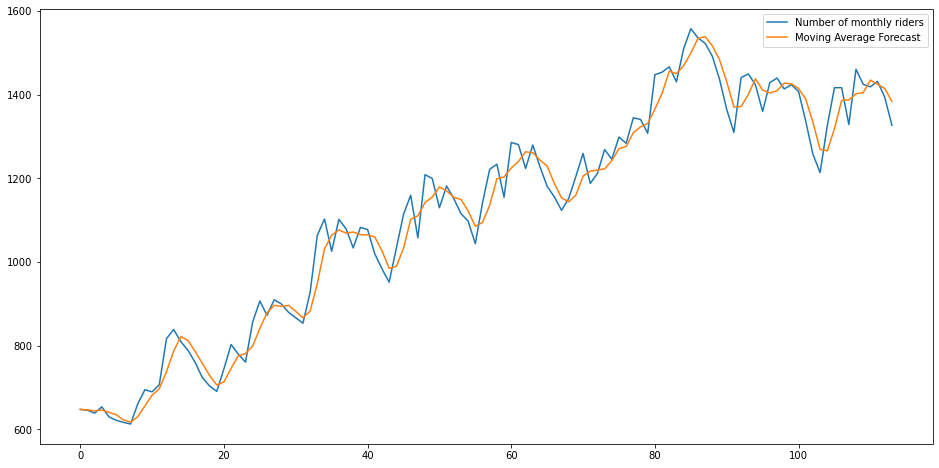

In [19]:
df_copy['moving_avg_forecast'] = df_copy['average_monthly_ridership'].rolling(3, min_periods=1).mean()
plt.figure(figsize=(16,8))
plt.plot(df_copy['average_monthly_ridership'], label='Number of monthly riders')
plt.plot(df_copy['moving_avg_forecast'], label='Moving Average Forecast')
plt.legend(loc='best')
plt.show()

### Simple Exponential Smoothing
- Exponential smoothing is a time series forecasting method for univariate data.
- Exponential smoothing forecasting methods are similar in that a prediction is a weighted sum of past observations, but the model explicitly uses an exponentially decreasing weight for past observations.
- Specifically, past observations are weighted with a geometrically decreasing ratio.
- `Simple Exponential Smoothing` is a time series forecasting method for univariate data without a trend or seasonality.
- It requires a single parameter, called alpha (a), also called the smoothing factor or smoothing coefficient.
- This parameter controls the rate at which the influence of the observations at prior time steps decay exponentially. 
- Alpha is often set to a value between 0 and 1. Large values mean that the model pays attention mainly to the most recent past observations, whereas smaller values mean more of the history is taken into account when making a prediction.
- Forecasts are calculated using weighted averages where the weights decrease exponentially as observations come from further in the past, the smallest weights are associated with the oldest observations:
![alt text](https://cdn.analyticsvidhya.com/wp-content/uploads/2018/01/Screen-Shot-2018-01-25-at-7.59.27-PM-768x90.png)

The one-step-ahead forecast for time T+1 is a weighted average of all the observations in the series y1,…,yT. The rate at which the weights decrease is controlled by the parameter α.

If you stare at it just long enough, you will see that the expected value ŷx is the sum of two products: α⋅yt and (1−α)⋅ŷ t-1.
Hence, it can also be written as:
![alt text](https://cdn.analyticsvidhya.com/wp-content/uploads/2018/01/Screen-Shot-2018-01-25-at-7.59.43-PM.png)

So essentially we’ve got a weighted moving average with two weights: α and 1−α.

As we can see, 1−α is multiplied by the previous expected value ŷ x−1 which makes the expression recursive. And this is why this method is called Exponential. The forecast at time t+1 is equal to a weighted average between the most recent observation yt and the most recent forecast ŷ t|t−1

In [20]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

# create class and fit model
model = SimpleExpSmoothing(np.asarray(df_copy['average_monthly_ridership'])).fit(smoothing_level=0.8)


C:\Users\fabi\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


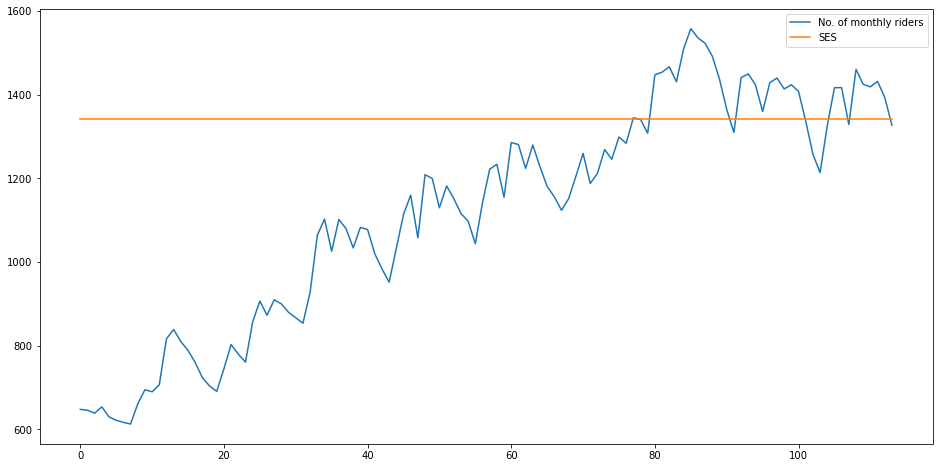

In [21]:
df_copy['SES'] = model.forecast(len(df_copy))
plt.figure(figsize=(16,8))
plt.plot(df_copy['average_monthly_ridership'], label='No. of monthly riders')
plt.plot(df_copy['SES'], label='SES')
plt.legend(loc='best')
plt.show()

### Holt’s Linear Trend method
Consider that the price of the bitcoin is increasing.
![alt text](https://cdn.analyticsvidhya.com/wp-content/uploads/2018/02/hl_new-768x408.png)

If we use any of the above methods, it won’t take into account this trend. Trend is the general pattern of prices that we observe over a period of time. In this case we can see that there is an increasing trend.

Although each one of the previous methods so far may be applied to the trend as well, there's a good chance they'll fail in proper anaylysis or prediction.

For e.g., the Naive method would assume that trend between last two points is going to stay the same, or we could average all slopes between all points to get an average trend, use a moving trend average or apply exponential smoothing.

But we need a method that can map the trend accurately without any assumptions. Such a method that takes into account the trend of the dataset is called Holt’s Linear Trend method.

Each Time series dataset can be decomposed into it’s componenets which are Trend, Seasonality and Residual. Any dataset that follows a trend can use Holt’s linear trend method for forecasting.

Holt extended simple exponential smoothing to allow forecasting of data with a trend. It is nothing more than exponential smoothing applied to both level(the average value in the series) and trend. To express this in mathematical notation we now need three equations: one for level, one for the trend and one to combine the level and trend to get the expected forecast ŷ.
![alt text](https://cdn.analyticsvidhya.com/wp-content/uploads/2018/02/eq-300x124.png)

The values we predicted in the above algorithms are called Level. In the above three equations, you can notice that we have added level and trend to generate the forecast equation.

As with simple exponential smoothing, the level equation here shows that it is a weighted average of observation and the within-sample one-step-ahead forecast The trend equation shows that it is a weighted average of the estimated trend at time t based on ℓ(t)−ℓ(t−1) and b(t−1), the previous estimate of the trend.

We will add these equations to generate Forecast equation. We can also generate a multiplicative forecast equation by multiplying trend and level instead of adding it. When the trend increases or decreases linearly, additive equation is used whereas when the trend increases of decreases exponentially, multiplicative equation is used.Practice shows that multiplicative is a more stable predictor, the additive method however is simpler to understand.
![alt text](https://cdn.analyticsvidhya.com/wp-content/uploads/2018/01/nnnnnn.png)

In [22]:
# Already established increasing trend in the decomposition stage
from statsmodels.tsa.api import Holt
model2 = Holt(np.asarray(df_copy['average_monthly_ridership'])).fit(smoothing_level = 0.3,smoothing_trend = 0.01)
df_copy['Holt_linear'] = model2.forecast(len(df_copy))

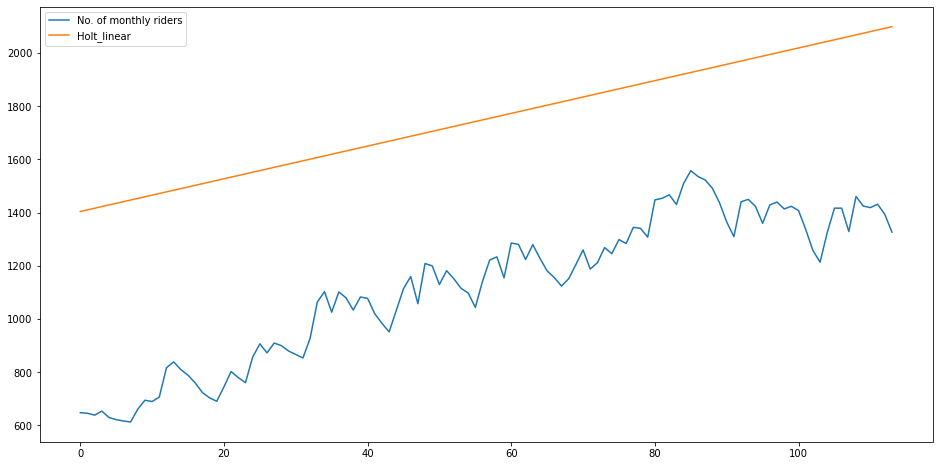

In [23]:
plt.figure(figsize=(16,8))
plt.plot(df_copy['average_monthly_ridership'], label='No. of monthly riders')
plt.plot(df_copy['Holt_linear'], label='Holt_linear')
plt.legend(loc='best')
plt.show()

### Holt-Winters Method
The above mentioned models don’t take into account the seasonality of the dataset while forecasting. Hence we need a method that takes into account both trend and seasonality to forecast future prices. One such algorithm that we can use in such a scenario is Holt’s Winter method. The idea behind triple exponential smoothing(Holt’s Winter) is to apply exponential smoothing to the seasonal components in addition to level and trend.

Using Holt’s winter method will be the best option among the rest of the models beacuse of the seasonality factor. The Holt-Winters seasonal method comprises the forecast equation and three smoothing equations — one for the level ℓt, one for trend bt and one for the seasonal component denoted by st, with smoothing parameters α, β and γ.
![alt text](https://cdn.analyticsvidhya.com/wp-content/uploads/2018/01/eq.png)

where s is the length of the seasonal cycle, for 0 ≤ α ≤ 1, 0 ≤ β ≤ 1 and 0 ≤ γ ≤ 1.

The level equation shows a weighted average between the seasonally adjusted observation and the non-seasonal forecast for time t. The trend equation is identical to Holt’s linear method. The seasonal equation shows a weighted average between the current seasonal index, and the seasonal index of the same season last year (i.e., s time periods ago).

In this method also, we can implement both additive and multiplicative technique.  The additive method is preferred when the seasonal variations are roughly constant through the series, while the multiplicative method is preferred when the seasonal variations are changing proportional to the level of the series.

In [24]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
model3 = ExponentialSmoothing(np.asarray(df_copy['average_monthly_ridership']), seasonal_periods=12 ,
                              trend='add', seasonal='add').fit()
df_copy['Holt_Winter'] = model3.forecast(len(df_copy))

Chose seasonal_periods = 12 since this is a monthly data

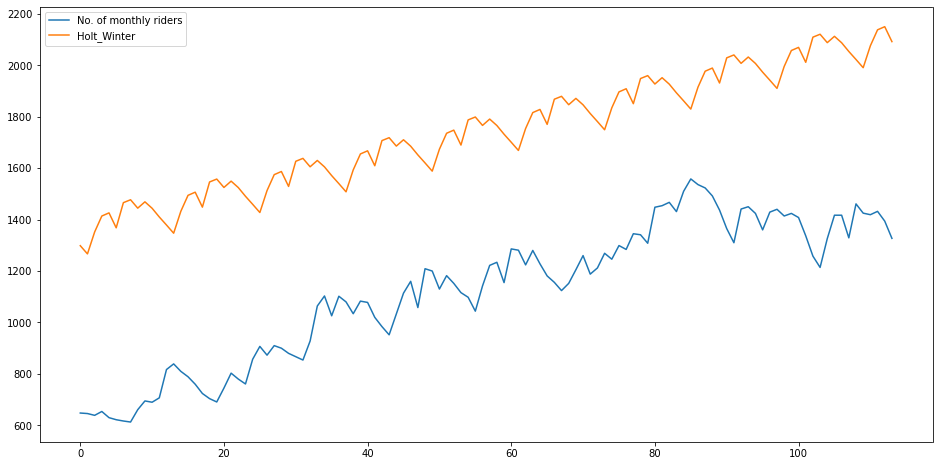

In [25]:
plt.figure(figsize=(16,8))
plt.plot(df_copy['average_monthly_ridership'], label='No. of monthly riders')
plt.plot(df_copy['Holt_Winter'], label='Holt_Winter')
plt.legend(loc='best')
plt.show()

### ARIMA
Another common Time series model that is very popular is ARIMA. It stand for Autoregressive Integrated Moving average. While exponential smoothing models were based on a description of trend and seasonality in the data, ARIMA models aim to describe the correlations in the data with each other.

Let’s Break it Down:-
- AR: Autoregression. A model that uses the dependent relationship between an observation and some number of lagged observations.
- I: Integrated. The use of differencing of raw observations in order to make the time series stationary.
- MA: Moving Average. A model that uses the dependency between an observation and a residual error from a moving average model applied to lagged observations.

The parameters of the ARIMA model are defined as follows:
- p: The number of lag observations included in the model, also called the lag order.
- d: The number of times that the raw observations are differenced, also called the degree of differencing.
- q: The size of the moving average window, also called the order of moving average.

So more formerly if we are saying that ARIMA(1,1,1) which means ARIMA model of order (1, 1, 1) where AR specification is 1, Integration order or shift order is 1 and Moving average specification is 1. 

To perform forecasting using the ARIMA model, we required a stationary time series. Stationary time series is a time series that is unaffected by the four time series components. Most often, it happens when the data is non-stationary the predictions we get from the ARIMA model are worse or not that accurate.

If the data is not stationary, we can do one thing: either make the data stationary or use the SARIMAX model.

To know more about the time series stationarity, we can perform the ADfuller test, a test based on hypothesis, where if the p-value is less than 0.05, then we can consider the time series is stationary, and if the P-value is greater than 0.05, then the time series is non-stationary.

In [26]:
from statsmodels.tsa.stattools import adfuller
dftest = adfuller(df_copy['average_monthly_ridership'], autolag = 'AIC')
print("1. ADF : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
print("5. Critical Values :")
for key, val in dftest[4].items():
    print("\t",key, ": ", val)

1. ADF :  -1.5365971444531599
2. P-Value :  0.5153358797821734
3. Num Of Lags :  12
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 101
5. Critical Values :
	 1% :  -3.4968181663902103
	 5% :  -2.8906107514600103
	 10% :  -2.5822770483285953


Here we can see that the p-value is higher for our dataset, and we can say that the evidence of the null hypothesis is low; hence the time series is non-stationary. We can make the time series stationary with differencing methods. In this case, we are going ahead with the rolling mean differencing methods.

Often with the data where the effect of seasonality is in excess, we use the rolling mean differencing.

<AxesSubplot:title={'center':'original'}>

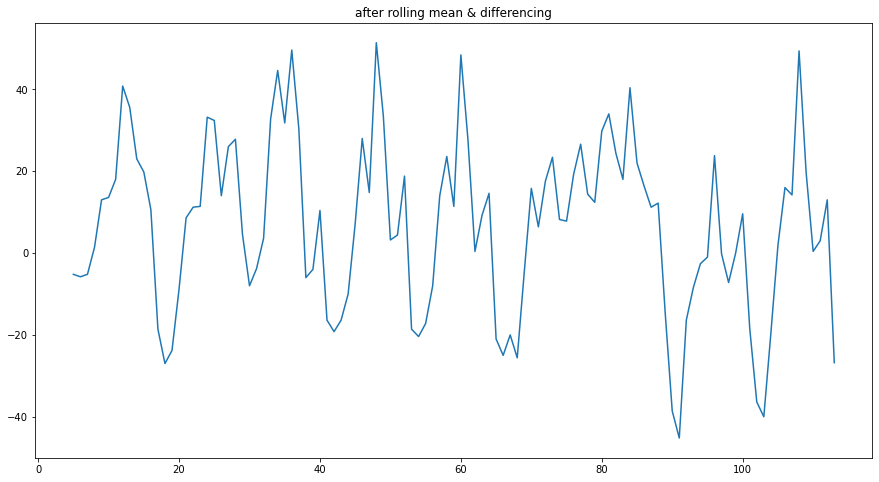

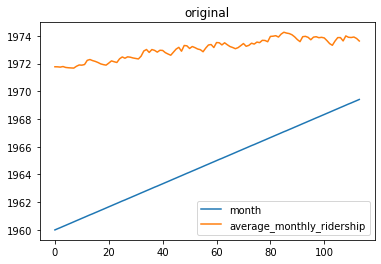

In [27]:
rolling_mean = df_copy['average_monthly_ridership'].rolling(window = 5).mean()
df_copy['rolling_mean_diff'] = rolling_mean - rolling_mean.shift()

plt.figure(figsize=(15,8))
ax1 = plt.subplot()
df_copy['rolling_mean_diff'].plot(title='after rolling mean & differencing')
ax2 = plt.subplot()
df.plot(title='original')

It seems we have reduced a lot of seasonality. We can also proceed for adfuller test where we can compare the p-value.

In [28]:
dftest = adfuller(df_copy['rolling_mean_diff'].dropna(), autolag = 'AIC')
print("1. ADF : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
print("5. Critical Values :")
for key, val in dftest[4].items():
    print("\t",key, ": ", val)

1. ADF :  -3.0157599803105986
2. P-Value :  0.03344859896351724
3. Num Of Lags :  13
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 95
5. Critical Values :
	 1% :  -3.5011373281819504
	 5% :  -2.8924800524857854
	 10% :  -2.5832749307479226


p-value = 0.03 which is less than 0.05, so data is now stationary

In [29]:
from statsmodels.tsa.arima_model import ARIMA
ar_model = ARIMA(df_copy['rolling_mean_diff'].dropna(),order=(2,1,4)).fit()

C:\Users\fabi\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\fabi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. fore

C:\Users\fabi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


<AxesSubplot:>

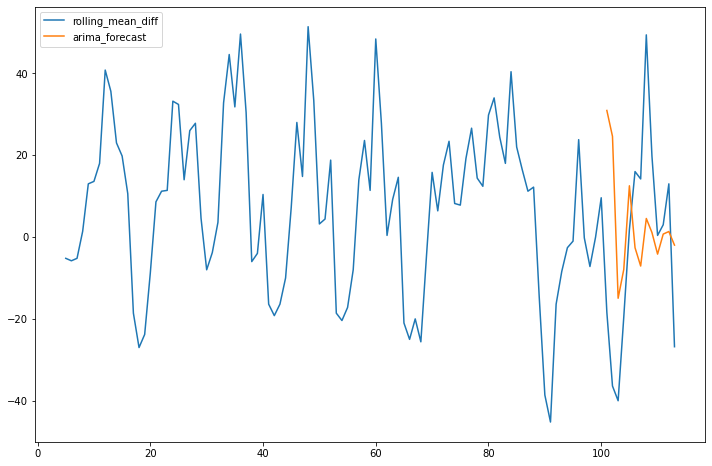

In [30]:
df_copy['arima_forecast'] = ar_model.predict(start=102,end=120,dynamic=True)
df_copy[['rolling_mean_diff','arima_forecast']].plot(figsize=(12,8))

### SARIMA Model
SARIMA model is built by extending the ARIMA model. In addition to terms AR, I and MA terms, there are four seasonal elements that are not part of ARIMA that must be configured; they are:

- P: Seasonal autoregressive order.
- D: Seasonal difference order.
- Q: Seasonal moving average order.
- m: The number of time steps for a single seasonal period.

The difference between ARIMA and SARIMA (SARIMAX) is about the seasonality of the dataset. If your data is seasonal, then we will use SARIMA.

SARIMAX(Seasonal Auto-Regressive Integrated Moving Average with eXogenous factors) is an updated version of the ARIMA model. ARIMA includes an autoregressive integrated moving average, while SARIMAX includes seasonal effects and eXogenous factors with the autoregressive and moving average component in the model. Therefore, we can say SARIMAX is a seasonal equivalent model.

In the SARIMAX models parameter, we need to provide two kinds of orders. The first one is similar to the ARIMAX model (p, d, q), and the other is to specify the effect of the seasonality; we call this order a seasonal order in which we are required to provide four numbers. 

In [31]:
# Applying Seasonal ARIMA model to forecast the data 
sar_model = sm.tsa.SARIMAX(df_copy['average_monthly_ridership'], trend='n', order=(0,1,0), seasonal_order=(1,1,1,12))
results = sar_model.fit()

<AxesSubplot:>

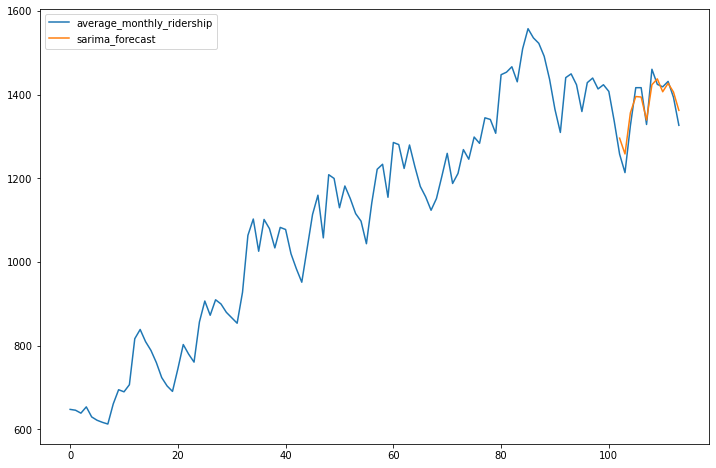

In [32]:
df_copy['sarima_forecast'] = results.predict(start=102,end=120,dynamic=True)
df_copy[['average_monthly_ridership','sarima_forecast']].plot(figsize=(12,8))

The forecasting line is almost lying on the given values for this model. We didn’t even require the differencing method. 

In [37]:
def forecast(model,predict_steps,df):
    
    pred_uc = model.get_forecast(steps=predict_steps)

    #SARIMAXResults.conf_int, can change alpha,the default alpha = .05 returns a 95% confidence interval.
    pred_ci = pred_uc.conf_int()

    ax = df['average_monthly_ridership'].plot(label='observed', figsize=(14, 7))
#   print(pred_uc.predicted_mean)
    pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
    ax.fill_between(pred_ci.index,
                    pred_ci.iloc[:, 0],
                    pred_ci.iloc[:, 1], color='k', alpha=.25)
    ax.set_xlabel('Date')
    ax.set_ylabel('Monthly Riders')

    plt.legend()
    plt.show()

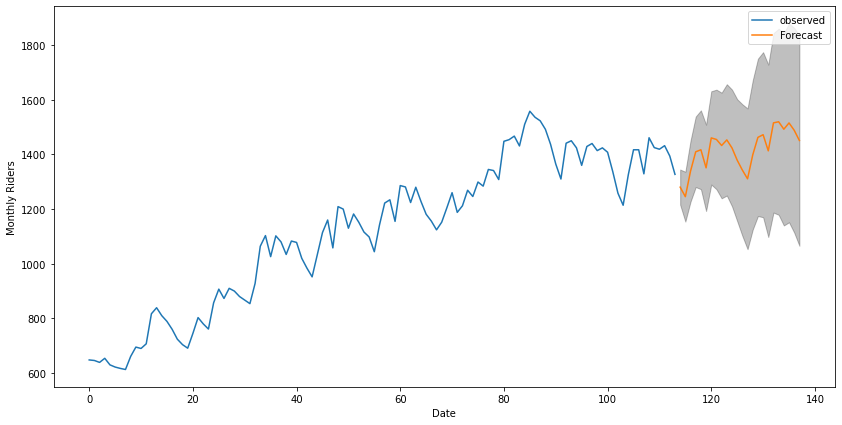

In [38]:
forecast(results,24,df)